# 第八次作業

In [48]:
# 16.5, 16.15, 16.27, 16.37, 16.43, 16.49, 16.81, 16.91, 16.99

In [49]:
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 100
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import statsmodels

def c_of_c_test(r, n, a):
    t_value = r * ((n-2)/(1 - r**2)) ** 0.5
    t_critical = stats.t.ppf(1 - a/2, n - 2)
    pval = stats.t.sf(np.abs(t_value), n - 2)*2
    print('r = ', r)
    print('t_critical = ', t_critical)
    print('t = ', t_value)
    print('p_value = ', pval)
    return t_value

def CI_simple_regression(df,x, y, x1, a):
    x_new = np.array([1, x1])
    X2 = sm.add_constant(x)
    olsmod = sm.OLS(y, X2)
    result_reg = olsmod.fit()
    #point prediction value
    y_head = np.dot(df.params, x_new)
    print("y_head = ", y_head)
    (t_minus, t_plus) = stats.t.interval(alpha = (1.0 - a), df = result_reg.df_resid )
    cov_mat1 = np.cov(y, x)
    x_bar = x.mean()
    core1 = (1 / result_reg.nobs + 
         (x1 - x_bar) ** 2 / (result_reg.nobs - 1) /    cov_mat1[1,1] ) ** 0.5
    lower_bound = y_head + t_minus * (result_reg.mse_resid ** 0.5) * core1
    upper_bound = y_head + t_plus * (result_reg.mse_resid ** 0.5) * core1
    half_interval = t_plus * (result_reg.mse_resid ** 0.5) * core1
    CI = np.array([lower_bound, upper_bound])
    print(f"{100*(1-a)}%% confidence interval for mean: [%0.4f, %0.4f]" % (lower_bound, upper_bound))
    print("    or %0.4f  +- %0.4f" % (y_head, half_interval))
    return CI

def PI_simple_regression(df,x, y, x1, a):
    x_new = np.array([1, x1])
    print("make prediction at new x = ", x1)
    X2 = sm.add_constant(x)
    olsmod = sm.OLS(y, X2)
    result_reg = olsmod.fit()
    y_head = np.dot(df.params, x_new)
    print("y_head = ", y_head)
    (t_minus, t_plus) = stats.t.interval(alpha = (1.0 - a), df = result_reg.df_resid )
    cov_mat1 = np.cov(y, x)
    x_bar = x.mean()
    core2 = (1 + 1 / result_reg.nobs + 
         (x1 - x_bar) ** 2 / (result_reg.nobs - 1) / cov_mat1[1,1] ) ** 0.5
    lower_bound = y_head + t_minus * (result_reg.mse_resid ** 0.5) * core2
    upper_bound = y_head + t_plus * (result_reg.mse_resid ** 0.5) * core2
    half_interval = t_plus * (result_reg.mse_resid ** 0.5) * core2
    PI = np.array([lower_bound, upper_bound])
    print(f"{100*(1-a)}%% prediction interval: [%0.4f, %0.4f]" % (lower_bound, upper_bound))
    print("    or %0.4f  +- %0.4f" % (y_head, half_interval))
    return PI

<div style="background-color:#D9D9D9;"><font size="5"> 16.5</font></div>

In [50]:
#(a.)
df5 = pd.read_excel('Xr16-05.xlsx')
#display(df5)
# Fit regression model 
df5_result1 = smf.ols('Beers~ Temperature', data=df5).fit()
# Inspect the results
print(df5_result1.summary())

b1 = df5_result1.params[1]
b0 = df5_result1.params[0]

print(f"\nEstimated model: y = {b0:.4f} + {b1:.4f} x")
print(f"Coefficients : {b0:.4f} and {b1:.4f}")

                            OLS Regression Results                            
Dep. Variable:                  Beers   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     80.61
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           1.89e-05
Time:                        03:19:25   Log-Likelihood:                -94.740
No. Observations:                  10   AIC:                             193.5
Df Residuals:                       8   BIC:                             194.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.007e+05   1.36e+04     -7.395      

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#(b.) <br>
The slope of the line is 1513.3276, and the y-intercept is -100678.1723.<br>
It means that for each additional degree of temperature, beers sale increase by an average of 1513.3276.

<div style="background-color:#D9D9D9;"><font size="5"> 16.15</font></div>

In [51]:
#(a.)
df5 = pd.read_excel('Xr16-15.xlsx')
# Fit regression model 
df5_result1 = smf.ols('Food~ Income', data=df5).fit()
# Inspect the results
print(df5_result1.summary())

b1 = df5_result1.params[1]
b0 = df5_result1.params[0]

print(f"\nEstimated model: y = {b0:.4f} + {b1:.4f} x")
print(f"Coefficients : {b0:.4f} and {b1:.4f}")

                            OLS Regression Results                            
Dep. Variable:                   Food   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     48.25
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           1.10e-10
Time:                        03:19:26   Log-Likelihood:                -753.23
No. Observations:                 150   AIC:                             1510.
Df Residuals:                     148   BIC:                             1516.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    153.8986     17.020      9.042      0.0

The slope of the line is 1.9582, and the y-intercept is 153.8986.<br>
It means that for each additional income of 1000s, money spent on food increase by an average of 1.9582.

<div style="background-color:#D9D9D9;"><font size="5"> 16.27</font></div>

H0: r = 0 <br>
H1: r ≠ 0 <br>
r is the  coefficient of correlation between two variables.

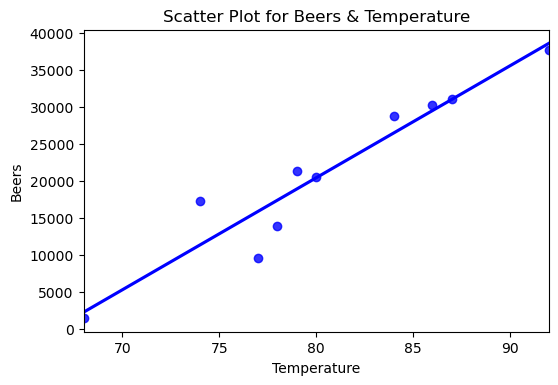

In [52]:
# draw plot
df5 = pd.read_excel('Xr16-05.xlsx')
_ = sns.regplot(x='Temperature', y= 'Beers', data = df5, color = 'b', ci = None)
plt.title('Scatter Plot for Beers & Temperature')
plt.xlabel('Temperature')
plt.ylabel('Beers')
plt.show()

In [53]:
# pearson
r, pvalue = stats.pearsonr(df5['Beers'], df5['Temperature'])
print("r = ", r)
print("r^2 = ", r**2)
print("")
cor_mat = np.corrcoef(df5[['Beers', 'Temperature']].values, rowvar = False)
n = df5['Beers'].shape[0]
r_t_value = c_of_c_test(cor_mat[1,0], n,0.05)

r =  0.9537919899105398
r^2 =  0.9097191600175073

r =  0.9537919899105395
t_critical =  2.3060041350333704
t =  8.978439669601617
p_value =  1.8860778146296194e-05


Since the p-value is lesser than 0.05 significance level, we can reject the null hypothesis in favor of the alternative one. Which show that there's strong relationship(r>0.75) between two variables.<br>
But according to the Scatter plot, they have positive relationship rather than negative.

<div style="background-color:#D9D9D9;"><font size="5"> 16.37</font></div>

In [54]:
#(a.)
df5 = pd.read_excel('Xr16-15.xlsx')
df5_result1 = smf.ols('Food~ Income', data=df5).fit()
R2 = df5_result1.rsquared
print("R2 = ", R2)

R2 =  0.24587056865702073


The coefficient of determination is 0.24587,<br> which means that about 24.587% of the money spent on food in one week is explained by the variation of income. The rest remains unexplained.

#(b.)
β is the coefficient of x of regression line <br>
H0: β=0 <br>
H1: β≠0 <br>
According to the result_summary of 16.15, the pvalue is 0.000 smaller than 0.05.rejected H0 with alpha = 0.05. We can tell there's evidence of linear relationship between between income and food budget.

<div style="background-color:#D9D9D9;"><font size="5"> 16.43</font></div>

In [55]:
print("H0: r = 0")
print("H1: r ≠ 0")
print("r is the  coefficient of correlation between two variables.")
cor_mat = np.corrcoef(df5[['Food', 'Income']].values, rowvar = False)
n = df5['Food'].shape[0]
r_t_value = c_of_c_test(cor_mat[1,0], n,0.05)
print("Since the p-value is lesser than 0.05, H0 is rejected with alpha = 0.05. We can tell that ")
print("there's linear relationship between money spent on food in one week & income.")

H0: r = 0
H1: r ≠ 0
r is the  coefficient of correlation between two variables.
r =  0.49585337415109
t_critical =  1.9761224936033632
t =  6.946422350608936
p_value =  1.1047043543420435e-10
Since the p-value is lesser than 0.05, H0 is rejected with alpha = 0.05. We can tell that 
there's linear relationship between money spent on food in one week & income.


<div style="background-color:#D9D9D9;"><font size="5"> 16.49</font></div>

In [56]:
#(a.)
df = pd.read_excel('Xr03-71.xlsx')
display(df.head())

# Fit regression model 
df_result1 = smf.ols('Distance~ Temperature', data=df).fit()
# Inspect the results
print(df_result1.summary())

b1 = df_result1.params[1]
b0 = df_result1.params[0]

print(f"\nEstimated model: y = {b0:.4f} + {b1:.4f} x")
print(f"Coefficients : {b0:.4f} and {b1:.4f}")

,Temperature,Distance
0,68,211
1,58,214
2,68,214
3,71,215
4,77,217


                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     34.75
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           1.00e-07
Time:                        03:19:29   Log-Likelihood:                -164.64
No. Observations:                  77   AIC:                             333.3
Df Residuals:                      75   BIC:                             338.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     202.2311      2.151     94.038      

In [57]:
print("H0: r = 0")
print("H1: r ≠ 0")
print("r is the  coefficient of correlation between two variables.")
cor_mat = np.corrcoef(df[['Distance', 'Temperature']].values, rowvar = False)
n = df.shape[0]
r_t_value = c_of_c_test(cor_mat[1,0], n,0.05)
print("Since p-value is lesser than 0.05 significance level, we reject null hypothesis in favor of the alternative one.")
print("there's positive relationship between distance and temperature.")

H0: r = 0
H1: r ≠ 0
r is the  coefficient of correlation between two variables.
r =  0.5627027138977262
t_critical =  1.9921021536898653
t =  5.894989925275379
p_value =  1.0017016662467413e-07
Since p-value is lesser than 0.05 significance level, we reject null hypothesis in favor of the alternative one.
there's positive relationship between distance and temperature.


#(b.)<br>
The slope coefficient is 0.1662. For each additional temperature, the distance increases by the average of 0.1662.

In [58]:
#(c.)
R2 = df_result1.rsquared
print("R2 = ", R2)

R2 =  0.31663434422786574


The coefficient of determination is 0.3166,<br> which means that about 31.66% of the variation in the distance is explained by the variation of temperature. The rest remains unexplained.

<div style="background-color:#D9D9D9;"><font size="5"> 16.81</font></div>

In [59]:
df5 = pd.read_excel('Xr16-05.xlsx')
df5_result1 = smf.ols('Beers~ Temperature', data=df5).fit()
CI_result = CI_simple_regression(df5_result1, df5['Temperature'],df5['Beers'], 75, 0.1)
print(CI_result)

y_head =  12821.398167239415
90.0% confidence interval for mean: [10127.0004, 15515.7959]
    or 12821.3982  +- 2694.3977
[10127.00041908 15515.7959154 ]


<div style="background-color:#D9D9D9;"><font size="5"> 16.91</font></div>

In [60]:
df5 = pd.read_excel('Xr16-15.xlsx')
df5_result1 = smf.ols('Food~ Income', data=df5).fit()
PI_result = PI_simple_regression(df5_result1,df5['Income'], df5['Food'],  60, 0.1)
print(PI_result)

make prediction at new x =  60
y_head =  271.3908922103403
90.0% prediction interval: [210.0443, 332.7375]
    or 271.3909  +- 61.3466
[210.04432133 332.73746309]


<div style="background-color:#D9D9D9;"><font size="5"> 16.99</font></div>

In [61]:
df5 = pd.read_excel('Xr03-71.xlsx')
df5_result1 = smf.ols('Distance~ Temperature', data=df5).fit()
PI_result = PI_simple_regression(df5_result1,df5['Temperature'], df5['Distance'],  80, 0.05)
print(PI_result)

make prediction at new x =  80
y_head =  215.5261364775043
95.0% prediction interval: [211.3492, 219.7030]
    or 215.5261  +- 4.1769
[211.34922963 219.70304332]
